<a href="https://colab.research.google.com/github/jingxlim/course-content/blob/interactive-track/tutorials/W1D5_DimensionalityReduction/student/W1D5_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy: Week 1, Day 5, Tutorial 1
# Dimensionality Reduction: Geometric view of data

__Content creators:__ Alex Cayco Gajic, John Murray

__Content reviewers:__ Roozbeh Farhoudi, Matt Krause, Spiros Chavlis, Richard Gao, Michael Waskom


---
# Tutorial Objectives

In this notebook we'll explore how multivariate data can be represented in different orthonormal bases. This will help us build intuition that will be helpful in understanding PCA in the following tutorial. 

Overview:
 - Generate correlated multivariate data.
 - Define an arbitrary orthonormal basis. 
 - Project the data onto the new basis.

Video available at https://youtube.com/watch?v=THu9yHnpq9I


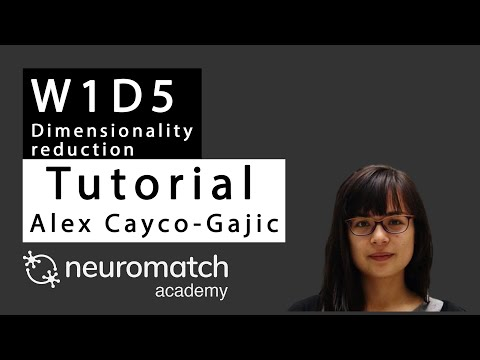

In [ ]:
# @title Video 1: Geometric view of data
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="THu9yHnpq9I", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

---
# Setup

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [3]:
# @title Helper functions


def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.

  Note that samples are sorted in ascending order for the first random variable

  Args:
    cov_matrix (numpy array of floats): desired covariance matrix

  Returns:
    (numpy array of floats) : samples from the bivariate Gaussian, with each
                              column corresponding to a different random
                              variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]

  return X


def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  plot of their joint activity. The title indicates the sample correlation
  calculated from the data.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(X[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number')
  plt.ylabel('Neuron 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(X[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) :   Data matrix each column corresponds to a
                                  different random variable
    W (numpy array of floats) :   Square matrix representing new orthonormal
                                  basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases.
  Similar to plot_data but with colors corresponding to projections onto
  basis 1 (red) and basis 2 (blue). The title indicates the sample correlation
  calculated from the data.

  Note that samples are re-sorted in ascending order for the first
  random variable.

  Args:
    Y (numpy array of floats):   Data matrix in new basis each column
                                 corresponds to a different random variable

  Returns:
    Nothing.
  """
  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.xlabel
  plt.ylabel('Projection \n basis vector 1')
  plt.title('Sample var 1: {:.1f}'.format(np.var(Y[:, 0])))
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  plt.title('Sample var 2: {:.1f}'.format(np.var(Y[:, 1])))
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

---
# Section 1: Generate correlated multivariate data

Video available at https://youtube.com/watch?v=jcTq2PgU5Vw


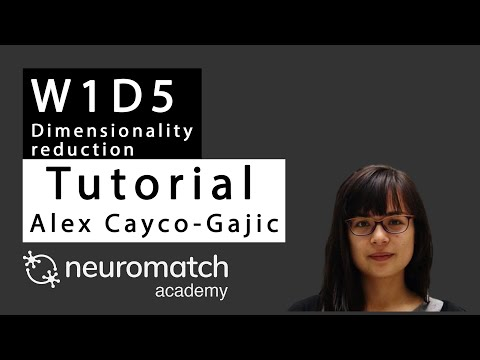

In [ ]:
# @title Video 2: Multivariate data
video = YouTubeVideo(id="jcTq2PgU5Vw", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

To gain intuition, we will first use a simple model to generate multivariate data. Specifically, we will draw random samples from a *bivariate normal distribution*. This is an extension of the one-dimensional normal distribution to two dimensions, in which each $x_i$ is marginally normal with mean $\mu_i$ and variance $\sigma_i^2$:

\begin{align}
x_i \sim \mathcal{N}(\mu_i,\sigma_i^2).
\end{align}

Additionally, the joint distribution for $x_1$ and $x_2$ has a specified correlation coefficient $\rho$. Recall that the correlation coefficient is a normalized version of the covariance, and ranges between -1 and +1:

\begin{align}
\rho = \frac{\text{cov}(x_1,x_2)}{\sqrt{\sigma_1^2 \sigma_2^2}}.
\end{align}

For simplicity, we will assume that the mean of each variable has already been subtracted, so that $\mu_i=0$. The remaining parameters can be summarized in the covariance matrix, which for two dimensions has the following form:

\begin{equation*}
{\bf \Sigma} = 
\begin{pmatrix}
 \text{var}(x_1) & \text{cov}(x_1,x_2) \\
 \text{cov}(x_1,x_2) &\text{var}(x_2)
\end{pmatrix}.
\end{equation*}

In general, $\bf \Sigma$ is a symmetric matrix with the variances $\text{var}(x_i) = \sigma_i^2$ on the diagonal, and the covariances on the off-diagonal. Later, we will see that the covariance matrix plays a key role in PCA.




## Exercise 1: Draw samples from a distribution

We have provided code to draw random samples from a zero-mean bivariate normal distribution. Throughout this tutorial, we'll imagine these samples represent the activity (firing rates) of two recorded neurons on different trials. Fill in the function below to calculate the covariance matrix given the desired variances and correlation coefficient. The covariance can be found by rearranging the equation above:

\begin{align}
\text{cov}(x_1,x_2) = \rho \sqrt{\sigma_1^2 \sigma_2^2}.
\end{align}

Use these functions to generate and plot data while varying the parameters. You should get a feel for how changing the correlation coefficient affects the geometry of the simulated data.

**Steps**
* Fill in the function `calculate_cov_matrix` to calculate the desired covariance.
* Generate and plot the data for $\sigma_1^2 =1$, $\sigma_1^2 =1$, and $\rho = .8$. Try plotting the data for different values of the correlation coefficent: $\rho = -1, -.5, 0, .5, 1$.

In [4]:
help(plot_data)
help(get_data)

Help on function plot_data in module __main__:

plot_data(X)
    Plots bivariate data. Includes a plot of each random variable, and a scatter
    plot of their joint activity. The title indicates the sample correlation
    calculated from the data.
    
    Args:
      X (numpy array of floats) :   Data matrix each column corresponds to a
                                    different random variable
    
    Returns:
      Nothing.

Help on function get_data in module __main__:

get_data(cov_matrix)
    Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.
    
    Note that samples are sorted in ascending order for the first random variable
    
    Args:
      cov_matrix (numpy array of floats): desired covariance matrix
    
    Returns:
      (numpy array of floats) : samples from the bivariate Gaussian, with each
                                column corresponding to a different random
                                variable



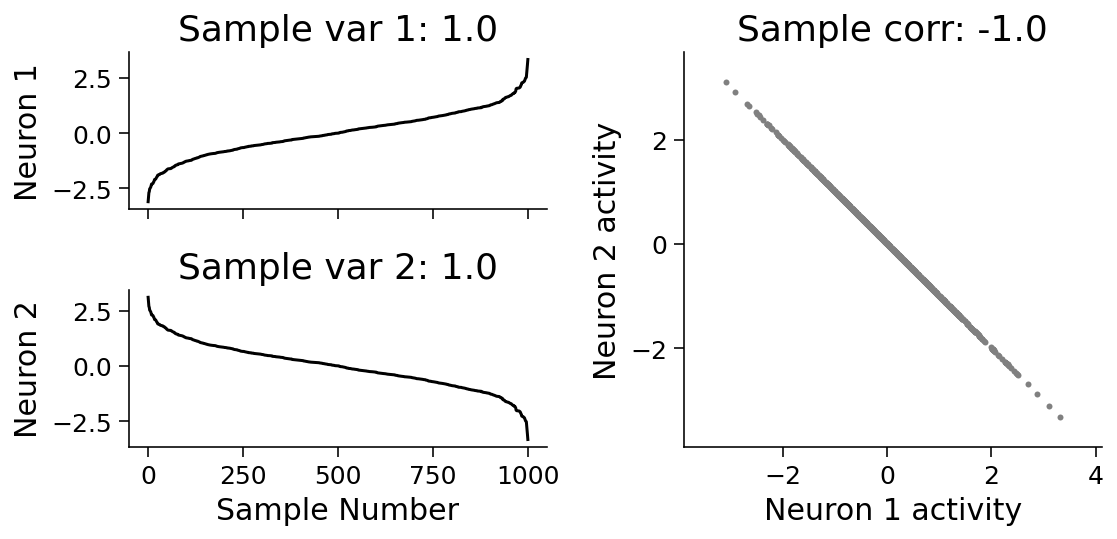

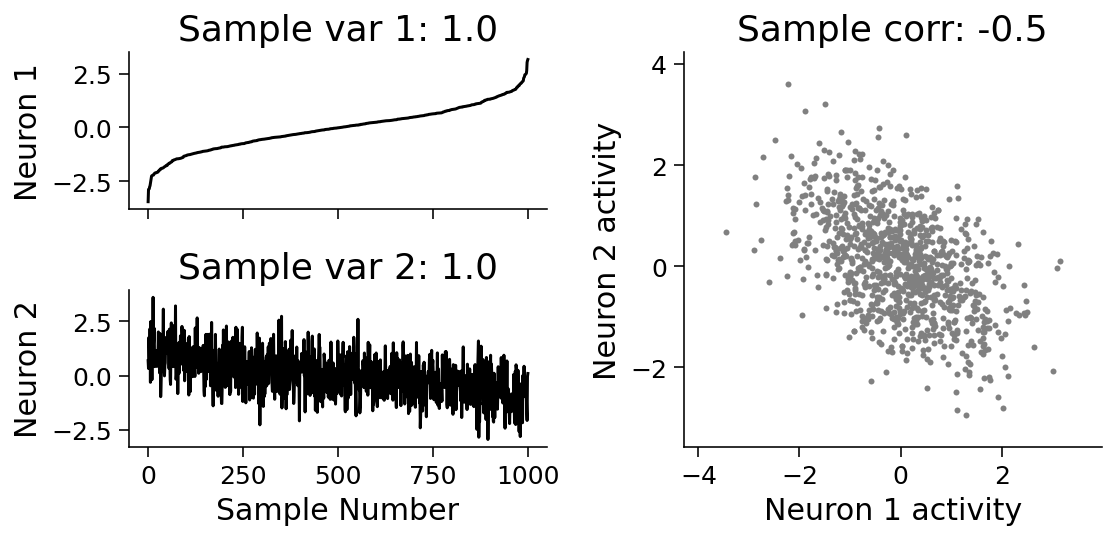

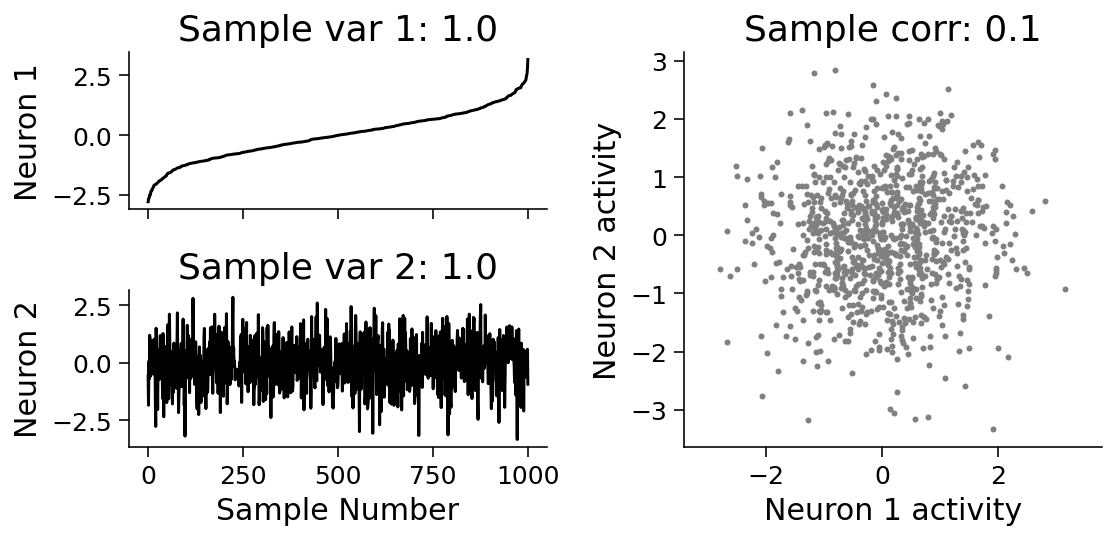

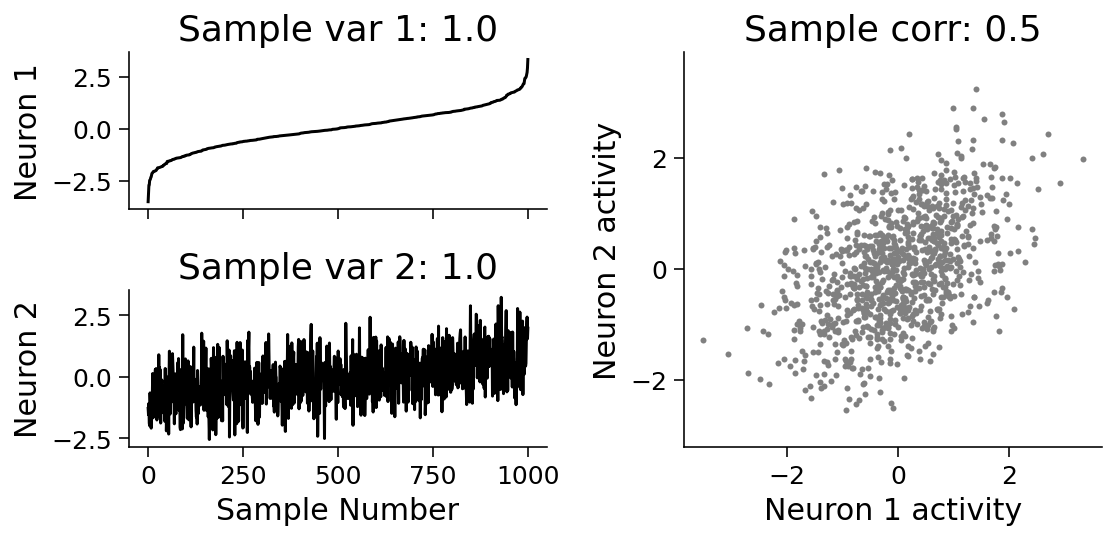

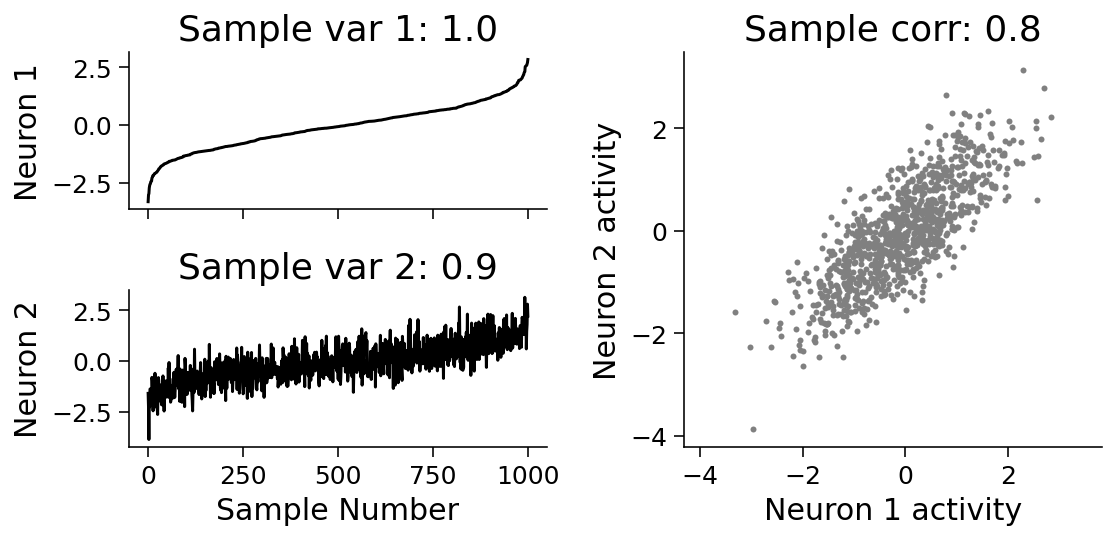

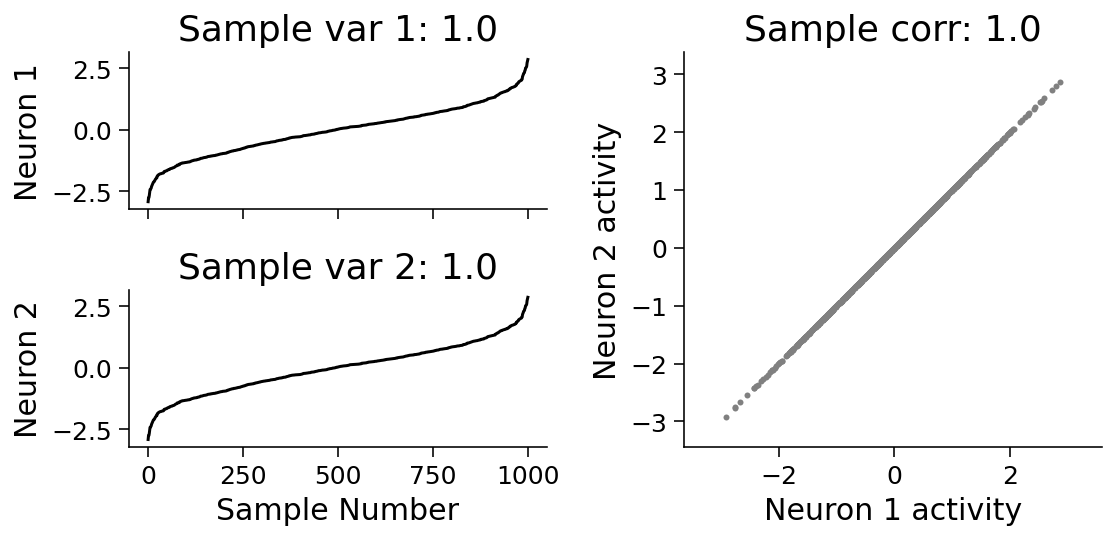

In [8]:
def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and correlation
  coefficient.

  Args:
    var_1 (scalar)          : variance of the first random variable
    var_2 (scalar)          : variance of the second random variable
    corr_coef (scalar)      : correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """

  #################################################
  ## TODO for students: calculate the covariance matrix
  # Fill out function and remove
  # raise NotImplementedError("Student excercise: calculate the covariance matrix!")
  #################################################

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


###################################################################
## TO DO for students: generate and plot bivariate Gaussian data with variances of 1
## and a correlation coefficients of: 0.8
## repeat while varying the correlation coefficient from -1 to 1
###################################################################
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1

for corr_coef in [-1, -0.5, 0, 0.5, 0.8, 1]: 
# corr_coef = 0.8

# Uncomment to test your code and plot
  cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
  X = get_data(cov_matrix)
  plot_data(X)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W1D5_DimensionalityReduction/solutions/W1D5_Tutorial1_Solution_57497711.py)

*Example output:*

<img alt='Solution hint' align='left' width=570 height=272 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W1D5_DimensionalityReduction/static/W1D5_Tutorial1_Solution_57497711_0.png>



---
# Section 2: Define a new orthonormal basis


Video available at https://youtube.com/watch?v=PC1RZELnrIg


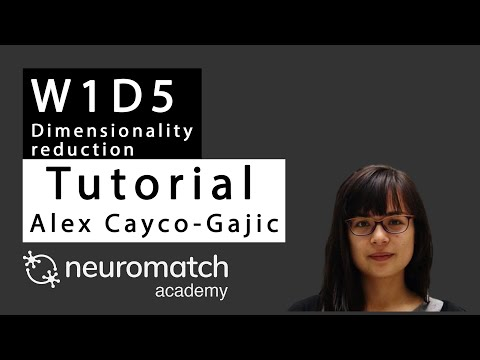

In [ ]:
# @title Video 3: Orthonormal bases
video = YouTubeVideo(id="PC1RZELnrIg", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

Next, we will define a new orthonormal basis of vectors ${\bf u} = [u_1,u_2]$ and ${\bf w} = [w_1,w_2]$. As we learned in the video, two vectors are orthonormal if: 

1.   They are orthogonal (i.e., their dot product is zero):
\begin{equation}
{\bf u\cdot w} = u_1 w_1 + u_2 w_2 = 0
\end{equation}
2.   They have unit length:
\begin{equation}
||{\bf u} || = ||{\bf w} || = 1
\end{equation}

In two dimensions, it is easy to make an arbitrary orthonormal basis. All we need is a random vector ${\bf u}$, which we have normalized. If we now define the second basis vector to be ${\bf w} = [-u_2,u_1]$, we can check that both conditions are satisfied: 
\begin{equation}
{\bf u\cdot w} = - u_1 u_2 + u_2 u_1 = 0
\end{equation}
and 
\begin{equation}
{|| {\bf w} ||} = \sqrt{(-u_2)^2 + u_1^2} = \sqrt{u_1^2 + u_2^2} = 1,
\end{equation}
where we used the fact that ${\bf u}$ is normalized. So, with an arbitrary input vector, we can define an orthonormal basis, which we will write in matrix by stacking the basis vectors horizontally:

\begin{equation}
{{\bf W} } =
\begin{pmatrix}
 u_1 & w_1 \\
 u_2 & w_2
\end{pmatrix}.
\end{equation}

 

## Exercise 2: Find an orthonormal basis

In this exercise you will fill in the function below to define an orthonormal basis, given a single arbitrary 2-dimensional vector as an input.

**Steps**
* Modify the function `define_orthonormal_basis` to first normalize the first basis vector $\bf u$.
* Then complete the function by finding a basis vector $\bf w$ that is orthogonal to $\bf u$.
* Test the function using initial basis vector ${\bf u} = [3,1]$. Plot the resulting basis vectors on top of the data scatter plot using the function `plot_basis_vectors`. (For the data, use  $\sigma_1^2 =1$, $\sigma_2^2 =1$, and $\rho = .8$).

In [ ]:
help(plot_basis_vectors)

Help on function plot_basis_vectors in module __main__:

plot_basis_vectors(X, W)
    Plots bivariate data as well as new basis vectors.
    
    Args:
      X (numpy array of floats) :   Data matrix each column corresponds to a
                                    different random variable
      W (numpy array of floats) :   Square matrix representing new orthonormal
                                    basis each column represents a basis vector
    
    Returns:
      Nothing.



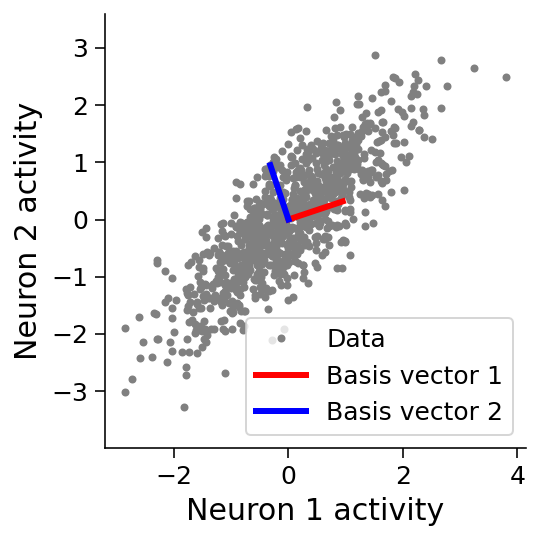

In [12]:
def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2-dimensional vector used for new
                                basis

  Returns:
    (numpy array of floats)   : new orthonormal basis
                                columns correspond to basis vectors
  """

  #################################################
  ## TODO for students: calculate the orthonormal basis
  # Fill out function and remove
  # raise NotImplementedError("Student excercise: implement the orthonormal basis function")
  #################################################
  
  # normalize vector u
  u = u / np.sqrt(u[0]**2 + u[1]**2)
  # calculate vector w that is orthogonal to w
  w = np.array([-u[1],u[0]])

  W = np.column_stack([u, w])

  return W


np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
X = get_data(cov_matrix)
u = np.array([3, 1])

# Uncomment and run below to plot the basis vectors
W = define_orthonormal_basis(u)
plot_basis_vectors(X, W)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W1D5_DimensionalityReduction/solutions/W1D5_Tutorial1_Solution_7a9640ef.py)

*Example output:*

<img alt='Solution hint' align='left' width=274 height=272 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W1D5_DimensionalityReduction/static/W1D5_Tutorial1_Solution_7a9640ef_0.png>



---
# Section 3: Project data onto new basis

Video available at https://youtube.com/watch?v=Mj6BRQPKKUc


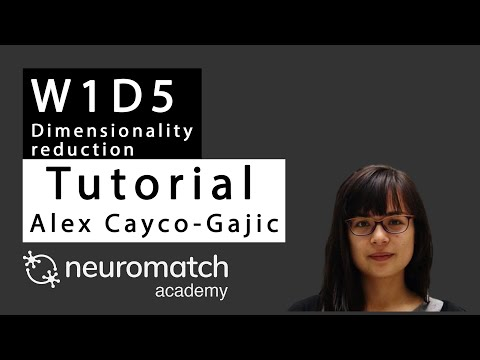

In [ ]:
# @title Video 4: Change of basis
video = YouTubeVideo(id="Mj6BRQPKKUc", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video


   
Finally, we will express our data in the new basis that we have just found. Since $\bf W$ is orthonormal, we can project the data into our new basis using simple matrix multiplication :

\begin{equation}
{\bf Y = X W}.
\end{equation}

We will explore the geometry of the transformed data $\bf Y$ as we vary the choice of basis.

## Exercise 3: Define an orthonormal basis
In this exercise you will fill in the function below to define an orthonormal basis, given a single arbitrary vector as an input.

**Steps**
* Complete the function `change_of_basis` to project the data onto the new basis.
* Plot the projected data using the function `plot_data_new_basis`. 
* What happens to the correlation coefficient in the new basis? Does it increase or decrease? 
* What happens to variance? 



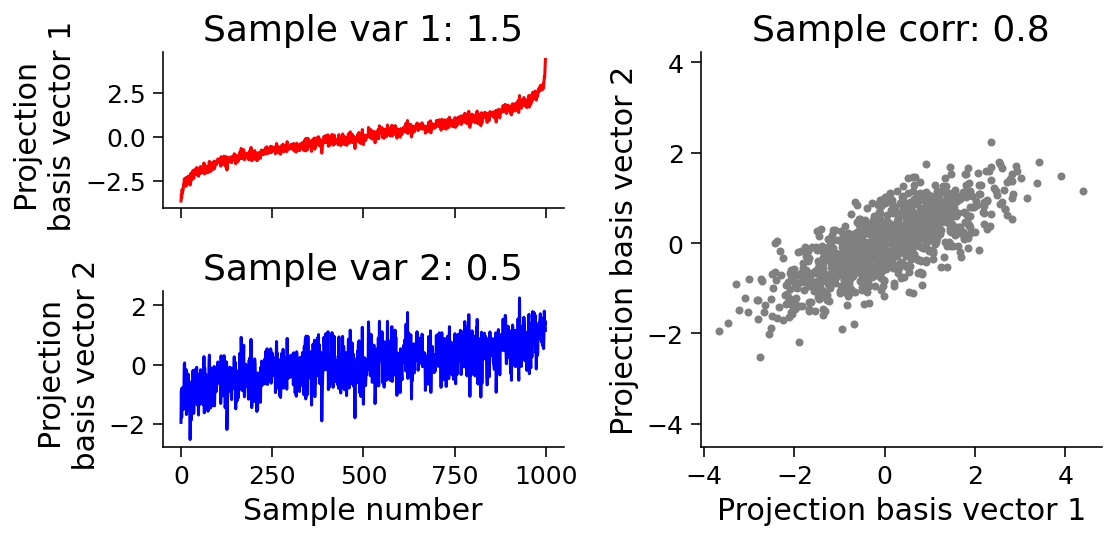

In [13]:
def change_of_basis(X, W):
  """
  Projects data onto new basis W.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)    : Data matrix expressed in new basis
  """

  #################################################
  ## TODO for students: project the data onto o new basis W
  # Fill out function and remove
  # raise NotImplementedError("Student excercise: implement change of basis")
  #################################################

  # project data onto new basis described by W
  Y = X @ W

  return Y


# Unomment below to transform the data by projecting it into the new basis
Y = change_of_basis(X, W)
plot_data_new_basis(Y)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W1D5_DimensionalityReduction/solutions/W1D5_Tutorial1_Solution_a1124bbc.py)

*Example output:*

<img alt='Solution hint' align='left' width=560 height=272 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W1D5_DimensionalityReduction/static/W1D5_Tutorial1_Solution_a1124bbc_0.png>



## Interactive Demo: Play with the basis vectors
To see what happens to the correlation as we change the basis vectors, run the cell below. The parameter $\theta$ controls the angle of $\bf u$ in degrees. Use the slider to rotate the basis vectors. 

In [14]:
# @title

# @markdown Make sure you execute this cell to enable the widget!


def refresh(theta=0):
  u = [1, np.tan(theta * np.pi / 180)]
  W = define_orthonormal_basis(u)
  Y = change_of_basis(X, W)
  plot_basis_vectors(X, W)
  plot_data_new_basis(Y)


_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…

## Questions

* What happens to the projected data as you rotate the basis? 
* How does the correlation coefficient change? How does the variance of the projection onto each basis vector change?
* Are you able to find a basis in which the projected data is **uncorrelated**?

---
# Summary

- In this tutorial, we learned that multivariate data can be visualized as a cloud of points in a high-dimensional vector space. The geometry of this cloud is shaped by the covariance matrix.

- Multivariate data can be represented in a new orthonormal basis using the dot product. These new basis vectors correspond to specific mixtures of the original variables - for example, in neuroscience, they could represent different ratios of activation  across a population of neurons.

- The projected data (after transforming into the new basis) will generally have a different geometry from the original data. In particular, taking basis vectors that are aligned with the spread of cloud of points decorrelates the data.

* These concepts - covariance, projections, and orthonormal bases - are key for understanding PCA, which we be our focus in the next tutorial.